# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_points_circle(points):
    vis = Visualizer()
    vis.axis_equal()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [5]:
def draw_line_circle(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.axis_equal()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [6]:
def draw_line_4(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [7]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

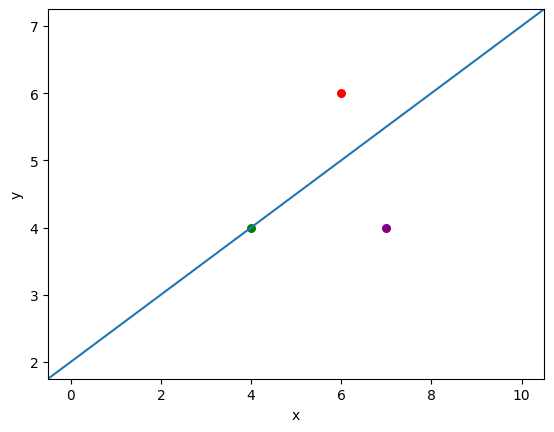

In [8]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [9]:
def generate_uniform_points(left, right, n = 10 ** 5):
    T=[(np.random.uniform(left, right),np.random.uniform(left, right)) for _ in range(n)]
    return T
        
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [10]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

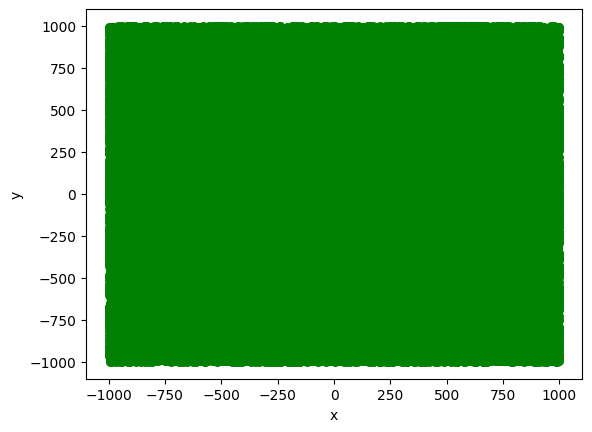

In [11]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [12]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

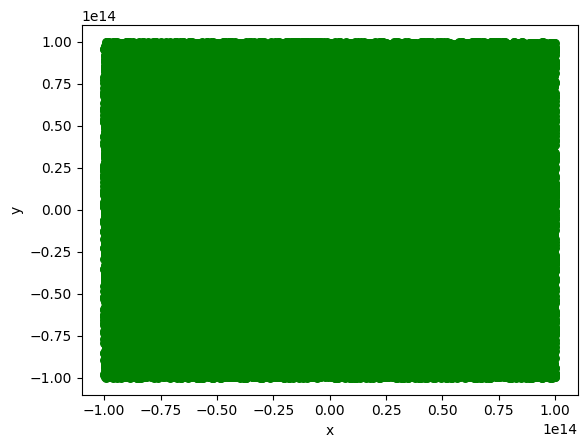

In [13]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [14]:
def generate_circle_points(O, R, n = 100):
    T=[(0,0) for _ in range(n)]
    for i in range(n):
        alfa=2*np.pi*np.random.random_sample()
        T[i]=(R*np.cos(2*np.pi*alfa),R*np.sin(2*np.pi*alfa))
    return T
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [15]:
points_c = generate_circle_points((0, 0), 100,1000)

Zwizualizuj wygenerowane punkty.

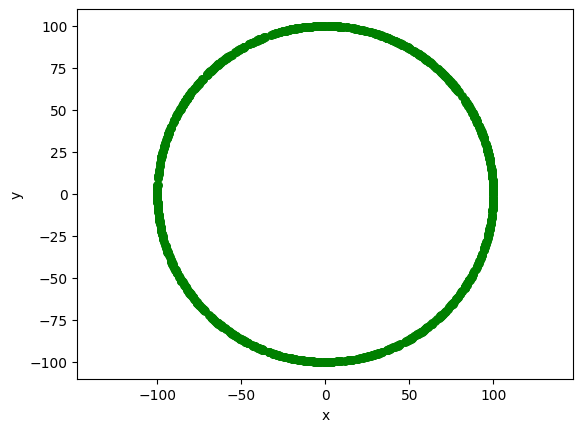

In [16]:
draw_points_circle(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [17]:
# dla punktow a=(-1.0,0.0),b=(1.0, 0.1)
# 0.0=-1.0*A+B, 0.1=1.0*a+B --> B=0.05, A=0,05
def generate_collinear_points(a, b, n=100):
    T=[(0,0) for _ in range(n)]
    for i in range(n):
        x=np.random.uniform(-1000, 1000)
        y=0.05*x+0.05
        T[i]=(x,y)
    return T
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [18]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1),1000)

Zwizualizuj wygenerowane punkty.

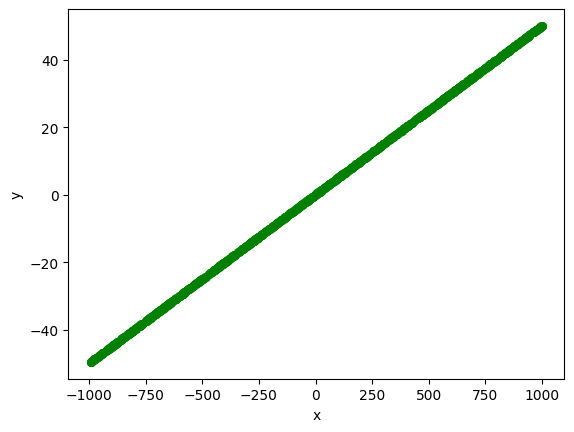

In [19]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [20]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.312s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [21]:
def mat_det_3x3(a, b, c):
    DET=(b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])
    return DET
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [22]:
def mat_det_3x3_lib(a, b, c):
    macierz = np.array([[a[0], a[1], 1],
                       [b[0], b[1], 1],
                       [c[0], c[1], 1]])
    DET=np.linalg.det(macierz)
    return DET
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

Uzupełnij funkcje ```mat_det_2x2```

In [23]:
def mat_det_2x2(a, b, c):
    DET=(a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])
    return DET
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [24]:
def mat_det_2x2_lib(a, b, c):
    macierz = np.array([[a[0] - c[0], a[1] - c[1]],
                       [b[0] - c[0], b[1] - c[1]]])
    DET=np.linalg.det(macierz)
    return DET
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

Przetestujmy napisane powyżej funkcje.

In [25]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [26]:
def categorize_points(points, a, b, mat_det_func, eps):
    L=[]
    M=[]
    R=[]
    for v in points:
        DET=mat_det_func(a,b,v)
        if DET > eps:
            L.append(v)
        elif DET<-eps:
            R.append(v)
        else:
            M.append(v)
    return L,M,R
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

In [27]:
def quantity(points,a,b): # funkcja obliczajaca rozłożenie punktów dla wszywstkich kombinacji epsilon i wyznacznika
    eps=[10 ** -8, 10 ** -10,10 ** -12,10 ** -14,0]
    mat_det_func=[(mat_det_2x2,"mat_det_2x2"),(mat_det_2x2_lib,"mat_det_2x2_lib"),(mat_det_3x3,"mat_det_3x3"),(mat_det_3x3_lib,"mat_det_3x3_lib")]
    LMR=[]
    freps=[]
    frmat=[]
    fLq=[]
    fMq=[]
    fRq=[]
    diffrence=True
    for mat,s in mat_det_func:
        for e in eps:
            #print(e,mat)
            L,M,R= categorize_points(points, a, b, mat, e)
            LMR.append([L,M,R])
            freps.append(e)
            frmat.append(s)
            fLq.append(len(L))
            fMq.append(len(M))
            fRq.append(len(R))
    if len(set(fLq))==1 and len(set(fMq))==1 and len(set(fRq))==1: diffrence=False
    if diffrence:
        frame = {
            "eps" : freps,
            "mat_det_func" : frmat,
            "po lewej" : fLq,
            "leżące na prostej" : fMq,
            "po prawej" : fRq,
        }
    else:
        frame = {
            "eps" : ["dla każdego przypadku"],
            "mat_det_func" : ["dla każdego przypadku"],
            "po lewej" : fLq[0],
            "leżące na prostej" : fMq[0],
            "po prawej" : fRq[0],
        }
    return frame,LMR
        
    
    

In [28]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [29]:
#classified_points_a_left_1,classified_points_a_mid_1,classified_points_a_right_1 = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -8)

In [30]:
#draw_line(classified_points_a_left_1, classified_points_a_mid_1, classified_points_a_right_1)

In [31]:
frame,LMR_a = quantity(points_a,a,b)
#print(len(classified_points_a_left_1),len(classified_points_a_mid_1),len(classified_points_a_right_1))

In [32]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,dla każdego przypadku,dla każdego przypadku,50014,0,49986


3
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
8
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
13
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
18
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986


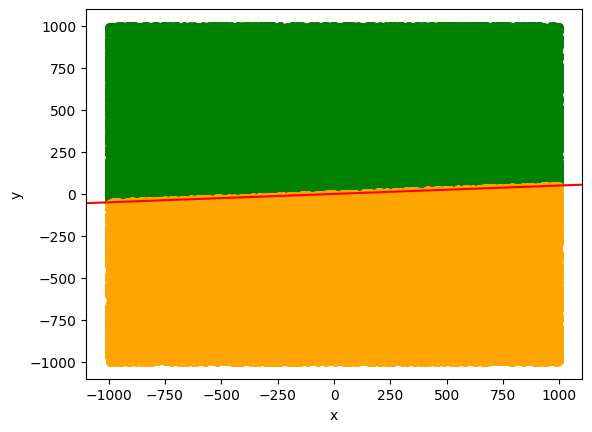

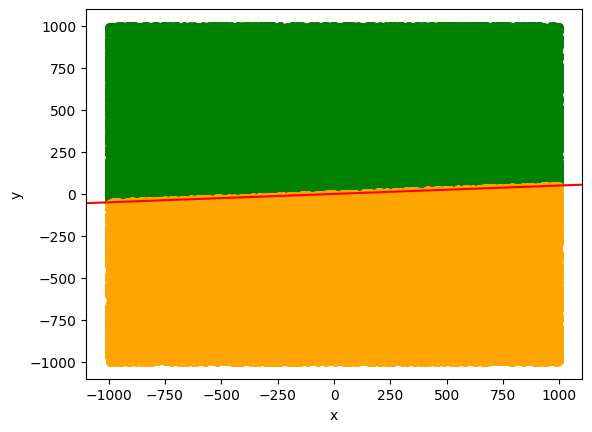

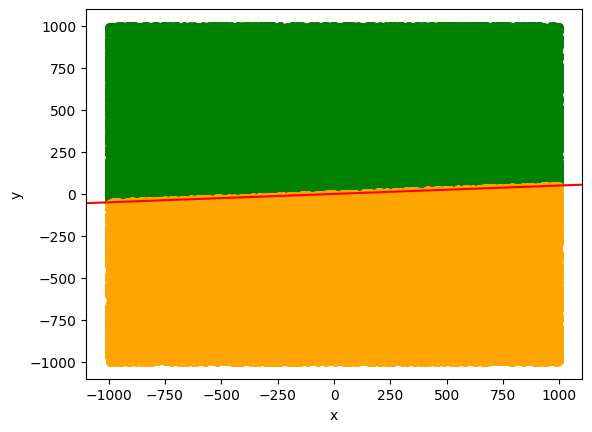

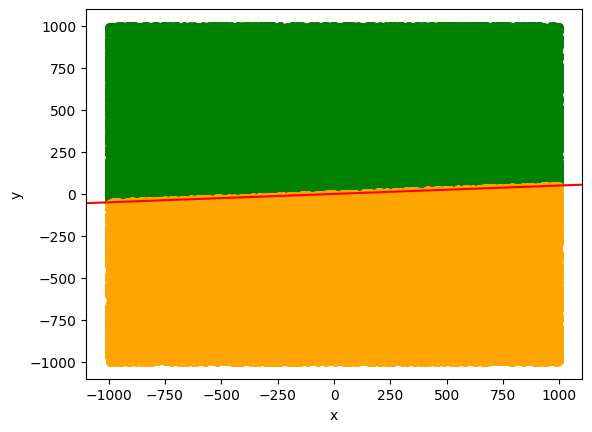

In [34]:
for i in range(3,20,5):
    print(i)
    draw_line(LMR_a[i][0],LMR_a[i][1],LMR_a[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_a[i][0]) ,"      leżace na prostej: ", len(LMR_a[i][1]) ,"     po prawej: ", len(LMR_a[i][2]))

In [36]:
#classified_points_a_left_2,classified_points_a_mid_2,classified_points_a_right_2 = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -10)

In [37]:
#draw_line(classified_points_a_left_2, classified_points_a_mid_2, classified_points_a_right_2)

In [38]:
#print(len(classified_points_a_left_1),len(classified_points_a_mid_1),len(classified_points_a_right_1))

In [39]:
frame,LMR_b = quantity(points_b,a,b)

In [40]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,1.000000e-08,mat_det_2x2,49774,5,50221
1,1.000000e-10,mat_det_2x2,49774,5,50221
2,1.000000e-12,mat_det_2x2,49774,5,50221
3,1.000000e-14,mat_det_2x2,49774,5,50221
4,0.000000e+00,mat_det_2x2,49774,5,50221
5,1.000000e-08,mat_det_2x2_lib,49775,3,50222
6,1.000000e-10,mat_det_2x2_lib,49775,3,50222
7,1.000000e-12,mat_det_2x2_lib,49775,3,50222
8,1.000000e-14,mat_det_2x2_lib,49775,3,50222
9,0.000000e+00,mat_det_2x2_lib,49775,3,50222


3
[(-81977756737662.86, -4131734371177.0156), (-67557822541807.47, -3370083784530.625), (-95225670028300.22, -4748875973118.031), (86762767843338.88, 4350004286034.9375), (-45688263235741.49, -2286121831731.875)]
Klasyfikacja:      Po lewej:  49774       leżace na prostej:  5      po prawej:  50221
8
[(-67557822541807.47, -3370083784530.625), (-95225670028300.22, -4748875973118.031), (-45688263235741.49, -2286121831731.875)]
Klasyfikacja:      Po lewej:  49775       leżace na prostej:  3      po prawej:  50222
13
[]
Klasyfikacja:      Po lewej:  49777       leżace na prostej:  0      po prawej:  50223
18
[]
Klasyfikacja:      Po lewej:  49777       leżace na prostej:  0      po prawej:  50223


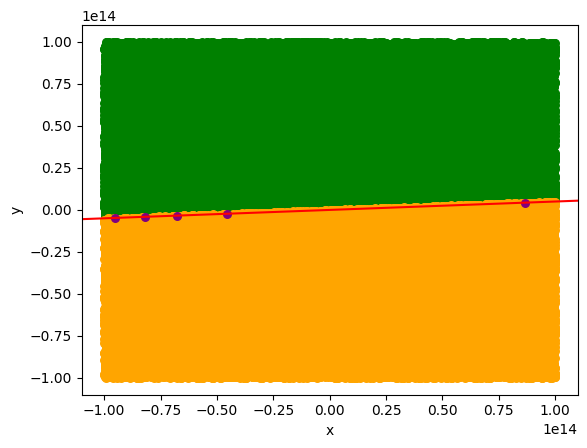

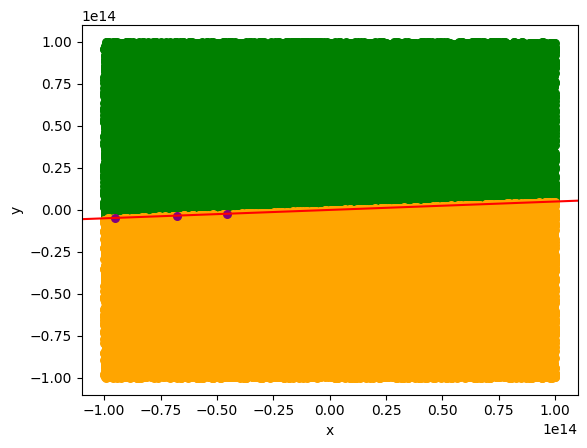

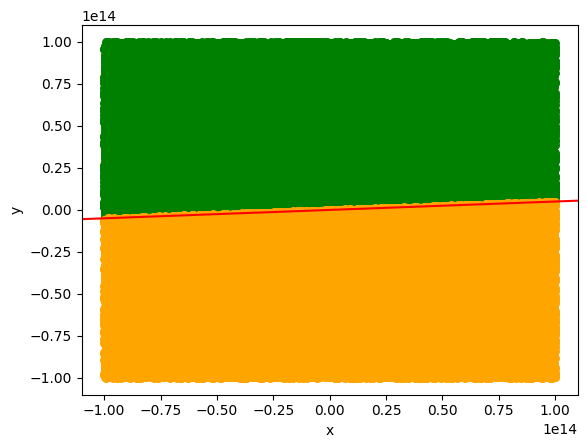

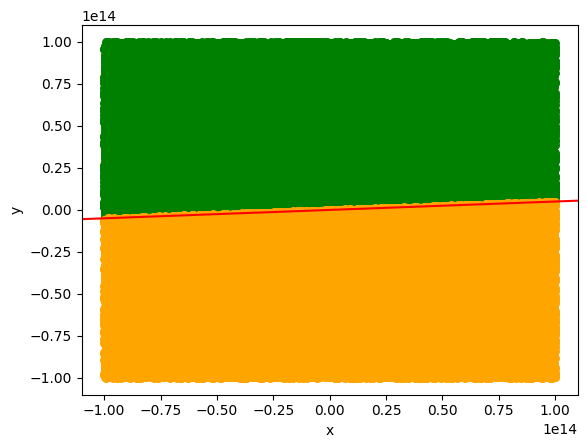

In [41]:
for i in range(3,20,5):
    print(i)
    draw_line(LMR_b[i][0],LMR_b[i][1],LMR_b[i][2])
    print(LMR_b[i][1])
    print("Klasyfikacja:      Po lewej: ", len(LMR_b[i][0]) ,"      leżace na prostej: ", len(LMR_b[i][1]) ,"     po prawej: ", len(LMR_b[i][2]))

In [42]:
#classified_points_b_left_1,classified_points_b_mid_1,classified_points_b_right_1 = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -8)

In [43]:
#draw_line(classified_points_b_left_1, classified_points_b_mid_1, classified_points_b_right_1)

In [44]:
frame,LMR_c = quantity(points_c,a,b)

In [45]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,dla każdego przypadku,dla każdego przypadku,521,0,479


3
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
8
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
13
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
18
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479


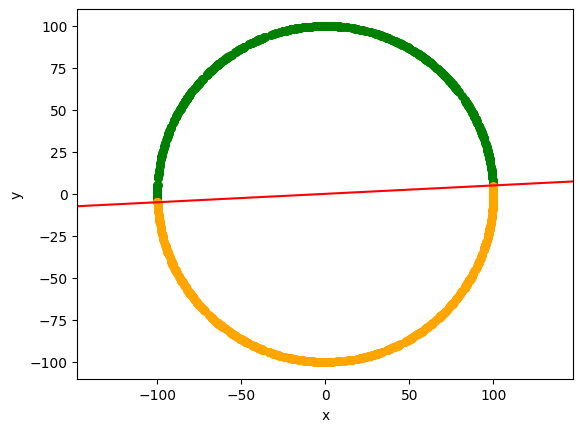

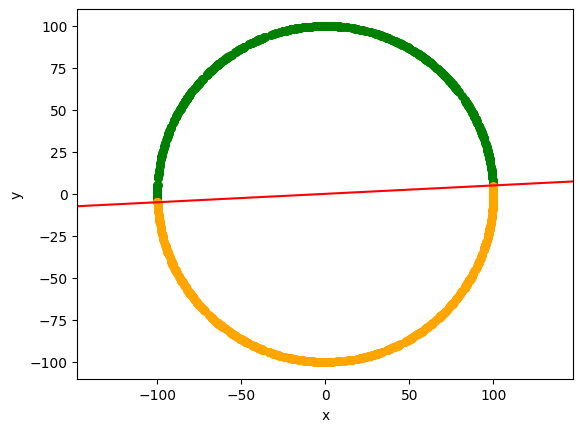

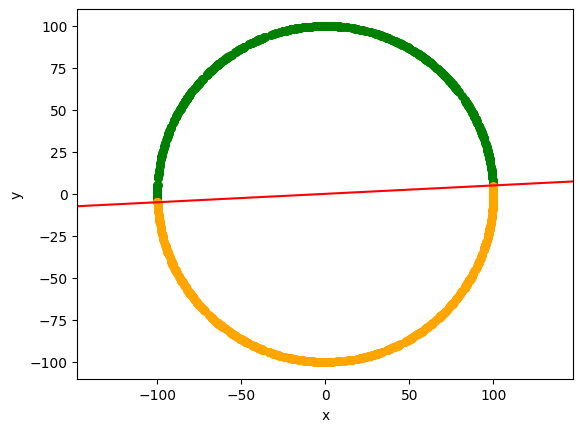

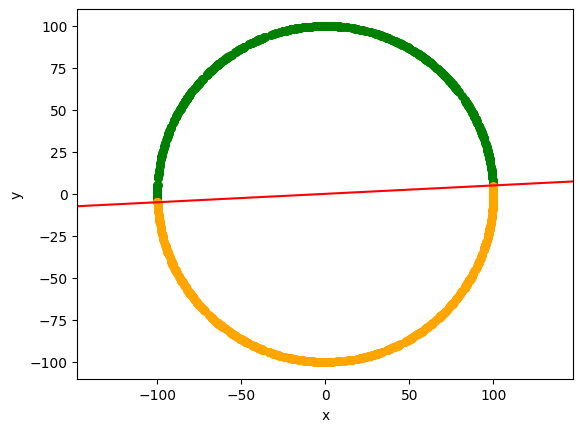

In [46]:
for i in range(3,20,5):
    print(i)
    draw_line_circle(LMR_c[i][0],LMR_c[i][1],LMR_c[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_c[i][0]) ,"      leżace na prostej: ", len(LMR_c[i][1]) ,"     po prawej: ", len(LMR_c[i][2]))

In [47]:
frame,LMR_d = quantity(points_d,a,b)

In [48]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,1.000000e-08,mat_det_2x2,0,1000,0
1,1.000000e-10,mat_det_2x2,0,1000,0
2,1.000000e-12,mat_det_2x2,83,836,81
3,1.000000e-14,mat_det_2x2,138,711,151
4,0.000000e+00,mat_det_2x2,145,692,163
5,1.000000e-08,mat_det_2x2_lib,0,1000,0
6,1.000000e-10,mat_det_2x2_lib,0,1000,0
7,1.000000e-12,mat_det_2x2_lib,122,776,102
8,1.000000e-14,mat_det_2x2_lib,155,702,143
9,0.000000e+00,mat_det_2x2_lib,168,686,146


3
Klasyfikacja:      Po lewej:  138       leżace na prostej:  711      po prawej:  151
8
Klasyfikacja:      Po lewej:  155       leżace na prostej:  702      po prawej:  143
13
Klasyfikacja:      Po lewej:  1       leżace na prostej:  787      po prawej:  212
18
Klasyfikacja:      Po lewej:  15       leżace na prostej:  879      po prawej:  106


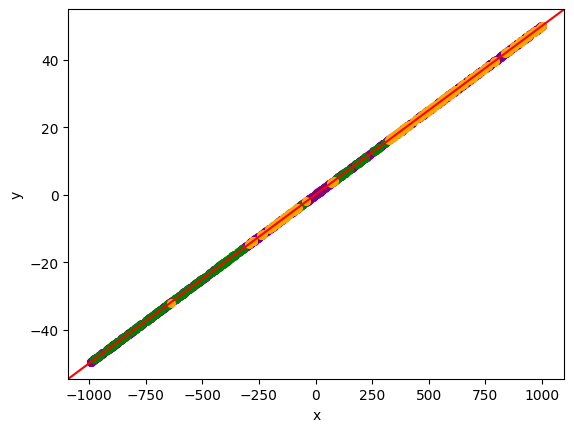

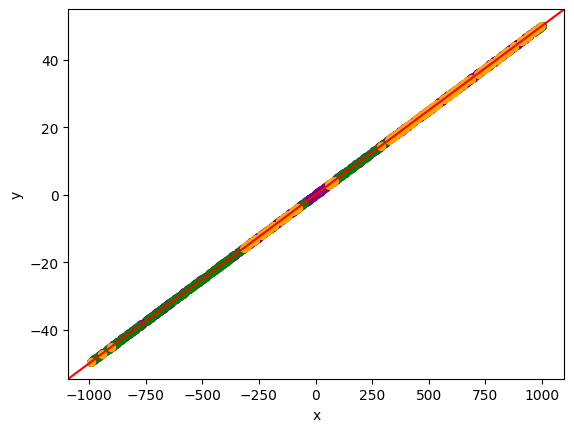

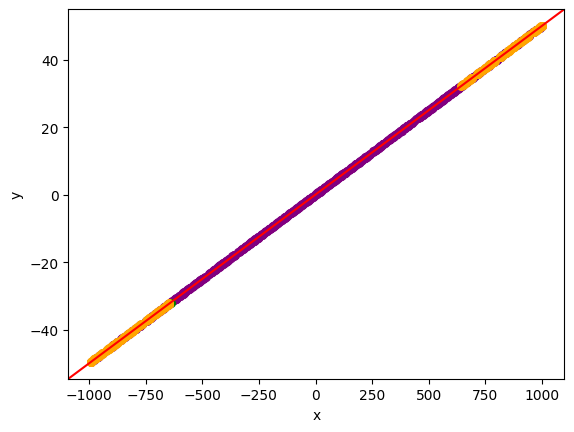

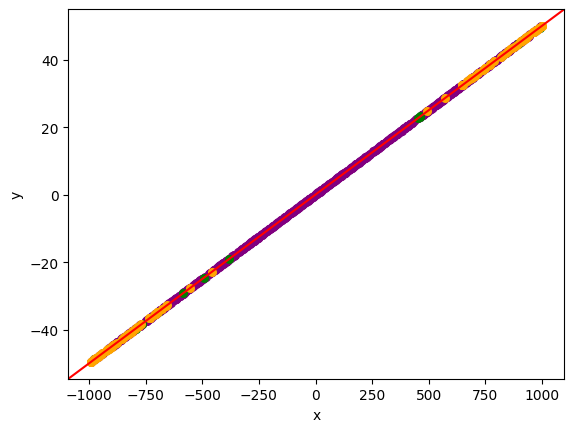

In [49]:
for i in range(3,20,5):
    print(i)
    draw_line_4(LMR_d[i][0],LMR_d[i][1],LMR_d[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_d[i][0]) ,"      leżace na prostej: ", len(LMR_d[i][1]) ,"     po prawej: ", len(LMR_d[i][2]))

In [50]:
#classified_points_c_left_1,classified_points_c_mid_1,classified_points_c_right_1 = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -8)

In [51]:
#draw_line(classified_points_c_left_1, classified_points_c_mid_1, classified_points_c_right_1)

In [52]:
#classified_points_d_left_1,classified_points_d_mid_1,classified_points_d_right_1 = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -8)

In [53]:
#draw_line(classified_points_d_left_1, classified_points_d_mid_1, classified_points_d_right_1)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [54]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

In [55]:
frame,LMR_a_float32 = quantity(points_a_float32,a,b)

In [56]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,dla każdego przypadku,dla każdego przypadku,50014,0,49986


3
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
8
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
13
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986
18
Klasyfikacja:      Po lewej:  50014       leżace na prostej:  0      po prawej:  49986


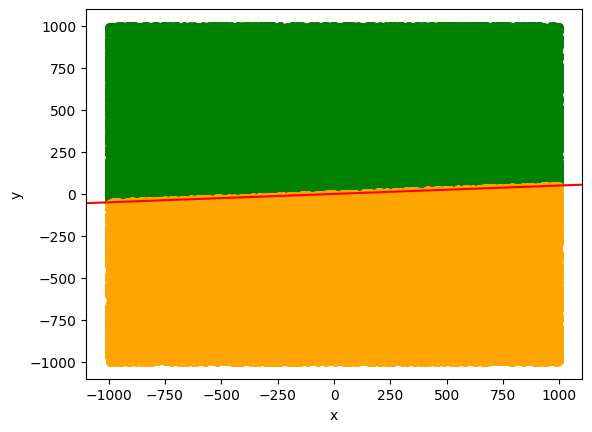

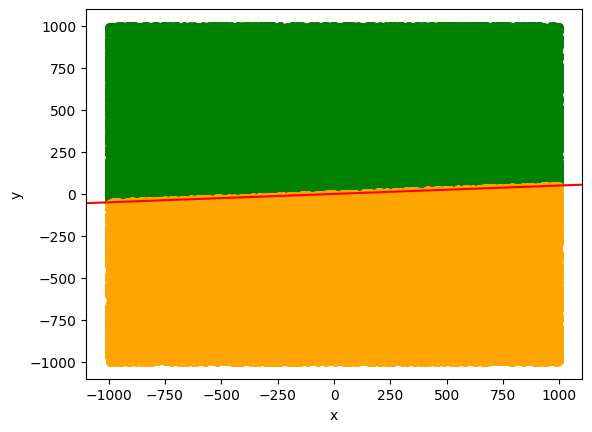

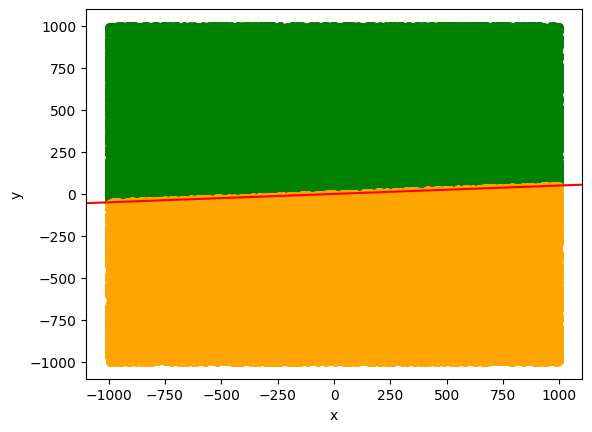

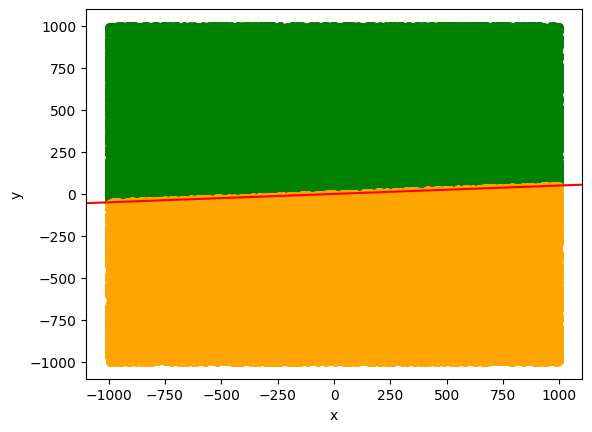

In [57]:
for i in range(3,20,5):
    print(i)
    draw_line(LMR_a_float32[i][0],LMR_a_float32[i][1],LMR_a_float32[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_a_float32[i][0]) ,"      leżace na prostej: ", len(LMR_a_float32[i][1]) ,"     po prawej: ", len(LMR_a_float32[i][2]))

In [59]:
frame,LMR_b_float32 = quantity(points_b_float32,a,b)

In [60]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,1.000000e-08,mat_det_2x2,49775,3,50222
1,1.000000e-10,mat_det_2x2,49775,3,50222
2,1.000000e-12,mat_det_2x2,49775,3,50222
3,1.000000e-14,mat_det_2x2,49775,3,50222
4,0.000000e+00,mat_det_2x2,49775,3,50222
5,1.000000e-08,mat_det_2x2_lib,49775,4,50221
6,1.000000e-10,mat_det_2x2_lib,49775,4,50221
7,1.000000e-12,mat_det_2x2_lib,49775,4,50221
8,1.000000e-14,mat_det_2x2_lib,49775,4,50221
9,0.000000e+00,mat_det_2x2_lib,49775,4,50221


3
Klasyfikacja:      Po lewej:  49775       leżace na prostej:  3      po prawej:  50222
8
Klasyfikacja:      Po lewej:  49775       leżace na prostej:  4      po prawej:  50221
13
Klasyfikacja:      Po lewej:  49777       leżace na prostej:  0      po prawej:  50223
18
Klasyfikacja:      Po lewej:  49777       leżace na prostej:  0      po prawej:  50223


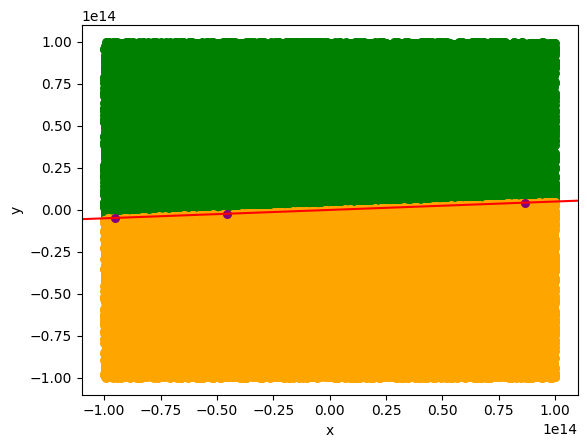

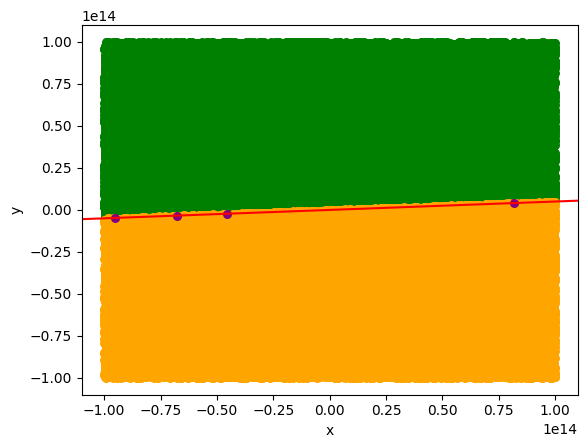

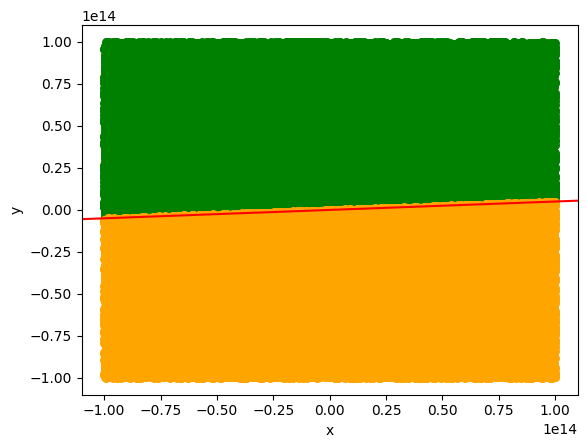

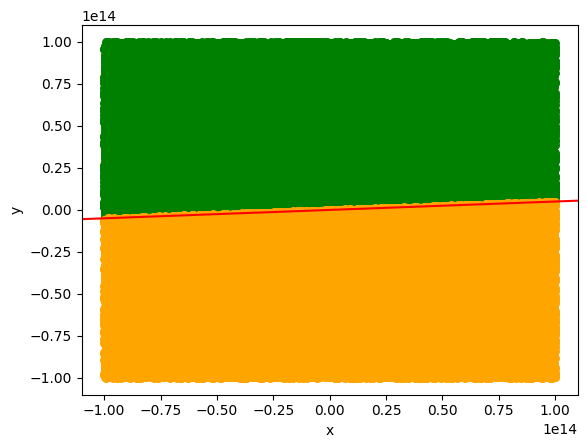

In [62]:
for i in range(3,20,5):
    print(i)
    draw_line(LMR_b_float32[i][0],LMR_b_float32[i][1],LMR_b_float32[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_b_float32[i][0]) ,"      leżace na prostej: ", len(LMR_b_float32[i][1]) ,"     po prawej: ", len(LMR_b_float32[i][2]))

In [63]:
frame,LMR_c_float32 = quantity(points_c_float32,a,b)

In [64]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,dla każdego przypadku,dla każdego przypadku,521,0,479


3
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
8
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
13
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479
18
Klasyfikacja:      Po lewej:  521       leżace na prostej:  0      po prawej:  479


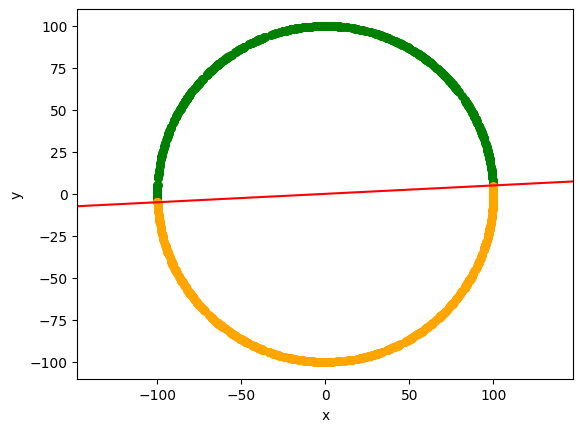

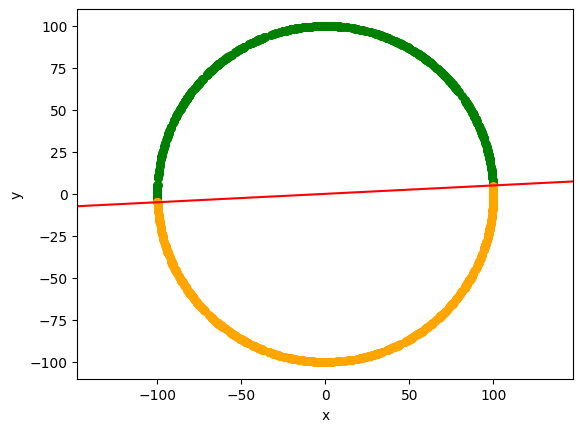

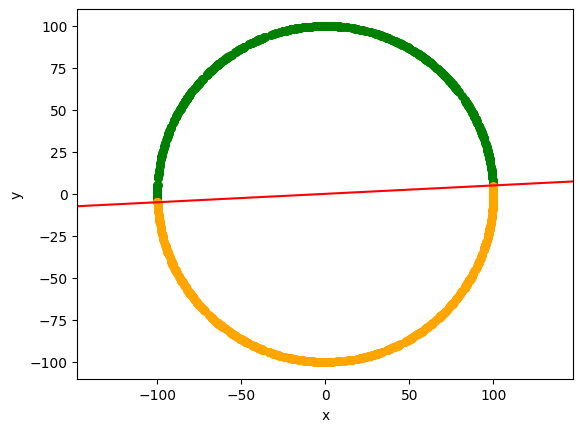

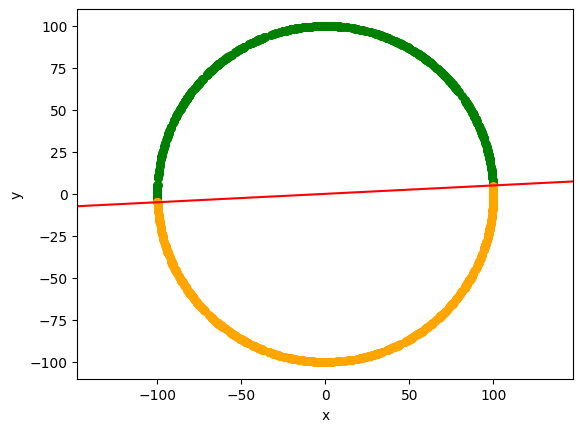

In [65]:
for i in range(3,20,5):
    print(i)
    draw_line_circle(LMR_c_float32[i][0],LMR_c_float32[i][1],LMR_c_float32[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_c_float32[i][0]) ,"      leżace na prostej: ", len(LMR_c_float32[i][1]) ,"     po prawej: ", len(LMR_c_float32[i][2]))

In [66]:
frame,LMR_d_float32 = quantity(points_d_float32,a,b)

In [67]:
df = pd.DataFrame(frame)
df

,eps,mat_det_func,po lewej,leżące na prostej,po prawej
0,1.000000e-08,mat_det_2x2,375,185,440
1,1.000000e-10,mat_det_2x2,375,183,442
2,1.000000e-12,mat_det_2x2,375,183,442
3,1.000000e-14,mat_det_2x2,382,163,455
4,0.000000e+00,mat_det_2x2,382,163,455
5,1.000000e-08,mat_det_2x2_lib,375,185,440
6,1.000000e-10,mat_det_2x2_lib,375,183,442
7,1.000000e-12,mat_det_2x2_lib,393,146,461
8,1.000000e-14,mat_det_2x2_lib,401,132,467
9,0.000000e+00,mat_det_2x2_lib,403,128,469


3
Klasyfikacja:      Po lewej:  382       leżace na prostej:  163      po prawej:  455
8
Klasyfikacja:      Po lewej:  401       leżace na prostej:  132      po prawej:  467
13
Klasyfikacja:      Po lewej:  375       leżace na prostej:  163      po prawej:  462
18
Klasyfikacja:      Po lewej:  387       leżace na prostej:  158      po prawej:  455


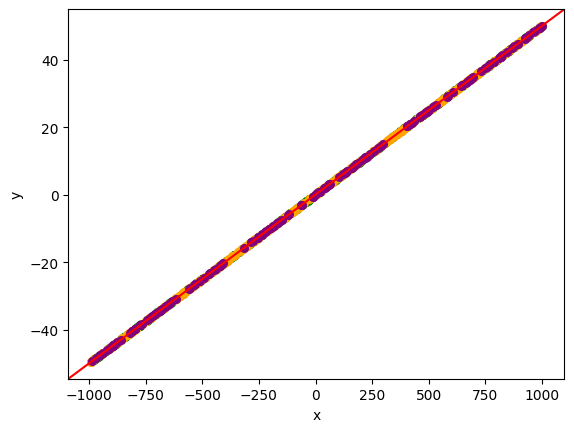

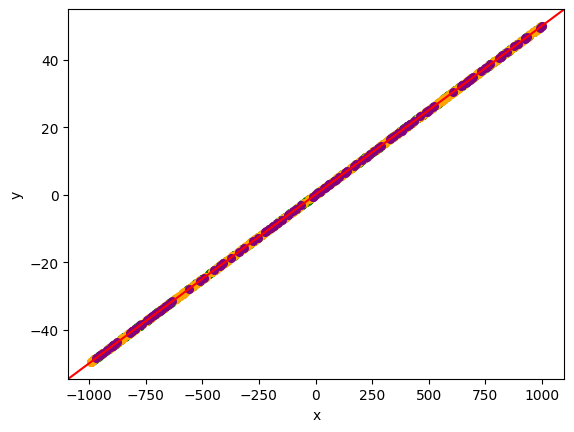

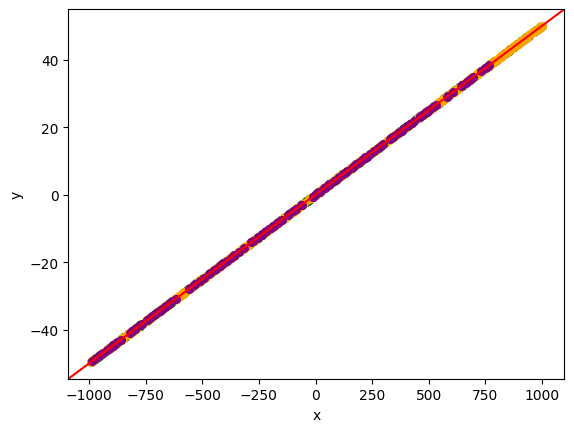

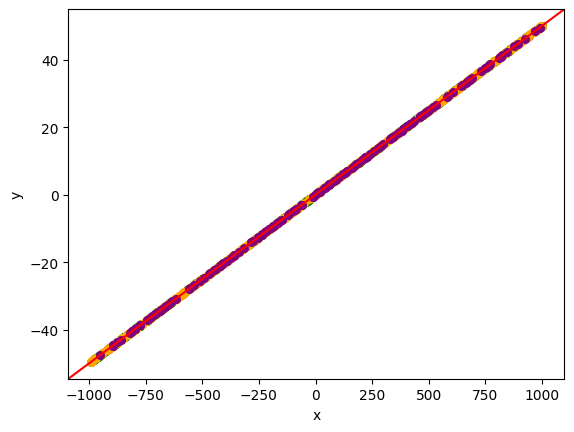

In [69]:
for i in range(3,20,5):
    print(i)
    draw_line(LMR_d_float32[i][0],LMR_d_float32[i][1],LMR_d_float32[i][2])
    print("Klasyfikacja:      Po lewej: ", len(LMR_d_float32[i][0]) ,"      leżace na prostej: ", len(LMR_d_float32[i][1]) ,"     po prawej: ", len(LMR_d_float32[i][2]))

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

# PORÓWNANIE DANYCH

In [70]:
def Diffrence(Data1,Data2):
    diff1=[]
    diff2=[]
    diff=[]
    count=0
    for d in Data1[0]:
        diff1.append((d[0],d[1],"L"))
    for d in Data1[1]:
        diff1.append((d[0],d[1],"M"))
    for d in Data1[2]:
        diff1.append((d[0],d[1],"R"))
    for d in Data2[0]:
        diff2.append((d[0],d[1],"L"))
    for d in Data2[1]:
        diff2.append((d[0],d[1],"M"))
    for d in Data2[2]:
        diff2.append((d[0],d[1],"R"))
    diff1.sort()
    diff2.sort()
    for i in range(len(diff1)):
        if diff1[i]!=diff2[i]:
             diff.append((diff1[i][0],diff1[i][1]))
             count+=1
    print("Diffrence: ",count)
    if count!=0:
        draw_points(diff)
    
    

In [71]:
print("Punkty skateryzowane inaczej w zestawie 1 dla mat_det_2x2 i mat_det_2x2_lib")
Diffrence(LMR_a[3],LMR_a[8])

Punkty skateryzowane inaczej w zestawie 1 dla mat_det_2x2 i mat_det_2x2_lib
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_2x2_lib
Diffrence:  2


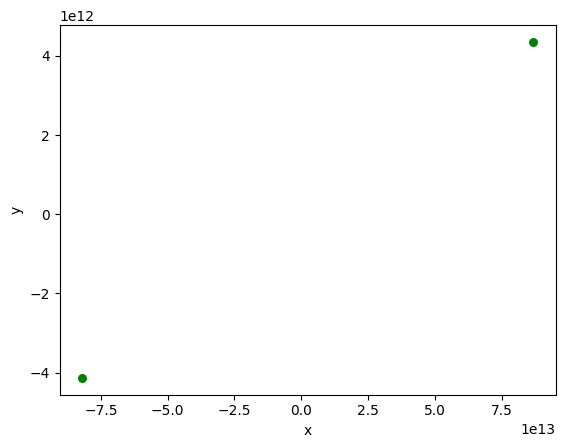

In [72]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_2x2_lib")
Diffrence(LMR_b[3],LMR_b[8])

In [74]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_3x3 i mat_det_3x3_lib")
Diffrence(LMR_b[13],LMR_b[18])

Punkty skateryzowane inaczej w zestawie 2 dla mat_det_3x3 i mat_det_3x3_lib
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_3x3
Diffrence:  5


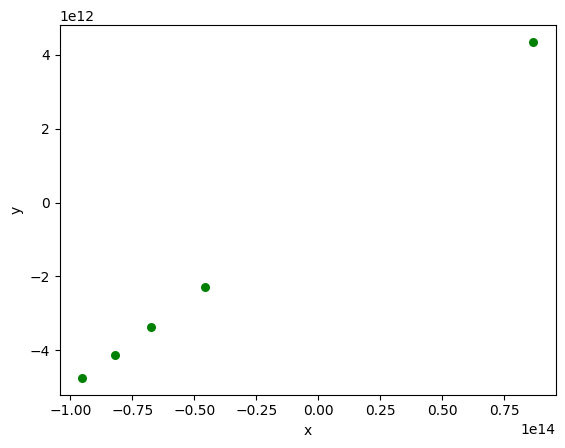

In [75]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_3x3")
Diffrence(LMR_b[3],LMR_b[13])

In [77]:
print("Punkty skateryzowane inaczej w zestawie 3 dla mat_det_2x2 i mat_det_3x3")
Diffrence(LMR_c[3],LMR_c[13])

Punkty skateryzowane inaczej w zestawie 3 dla mat_det_2x2 i mat_det_3x3
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_2x2_lib
Diffrence:  377


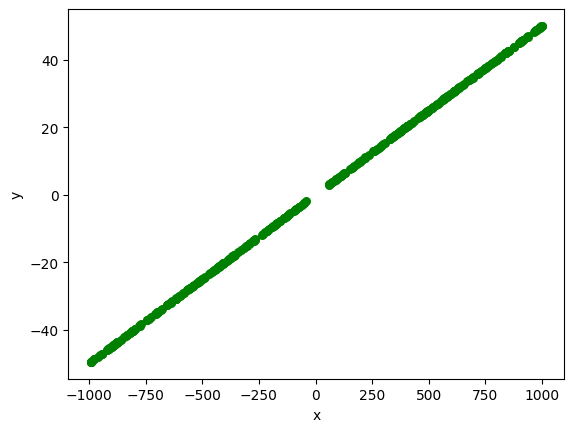

In [78]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_2x2_lib")
Diffrence(LMR_d[3],LMR_d[8])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_2x2_lib
Diffrence:  175


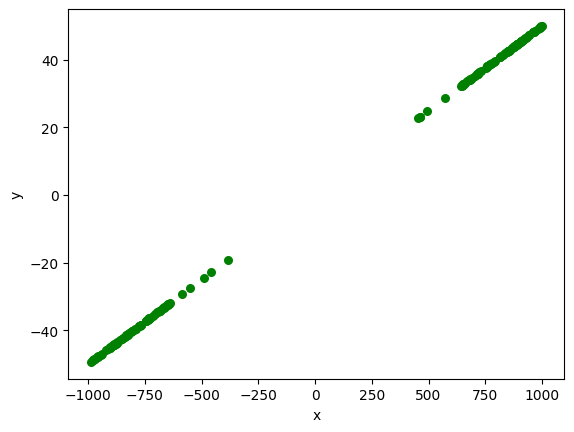

In [79]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_3x3 i mat_det_3x3_lib")
Diffrence(LMR_d[13],LMR_d[18])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_3x3
Diffrence:  434


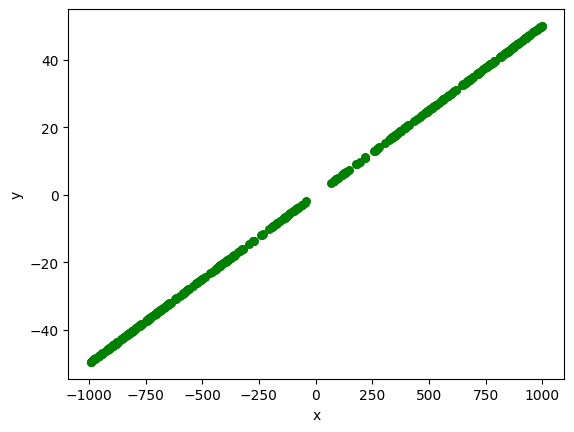

In [80]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_3x3")
Diffrence(LMR_d[3],LMR_d[13])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2_lib i mat_det_3x3_lib
Diffrence:  362


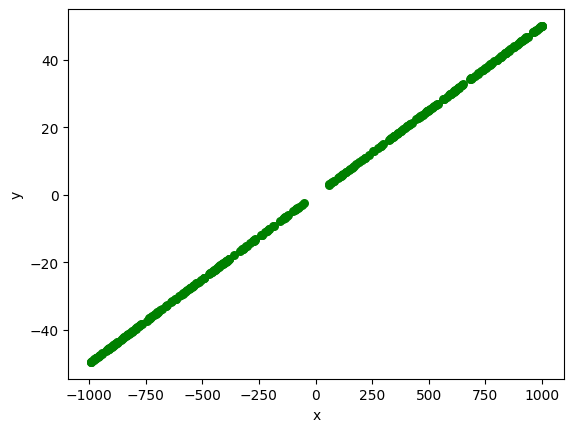

In [81]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2_lib i mat_det_3x3_lib")
Diffrence(LMR_d[8],LMR_d[18])

# POROWNANIE DANYCH (FLOAT32)

In [83]:
print("Punkty skateryzowane inaczej w zestawie 1 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32")
Diffrence(LMR_a_float32[3],LMR_a_float32[8])

Punkty skateryzowane inaczej w zestawie 1 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32
Diffrence:  3


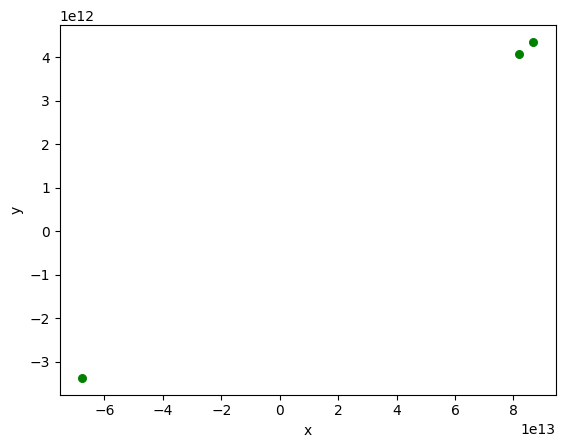

In [84]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32")
Diffrence(LMR_b_float32[3],LMR_b_float32[8])

In [85]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_3x3 i mat_det_3x3_lib dla precyzji float32")
Diffrence(LMR_b_float32[13],LMR_b_float32[18])

Punkty skateryzowane inaczej w zestawie 2 dla mat_det_3x3 i mat_det_3x3_lib dla precyzji float32
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32
Diffrence:  3


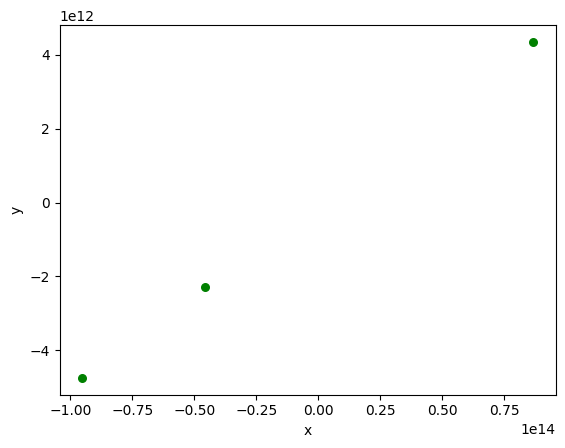

In [86]:
print("Punkty skateryzowane inaczej w zestawie 2 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32")
Diffrence(LMR_b_float32[3],LMR_b_float32[13])

In [87]:
print("Punkty skateryzowane inaczej w zestawie 3 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32")
Diffrence(LMR_c_float32[3],LMR_c_float32[13])

Punkty skateryzowane inaczej w zestawie 3 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32
Diffrence:  0


Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32
Diffrence:  57


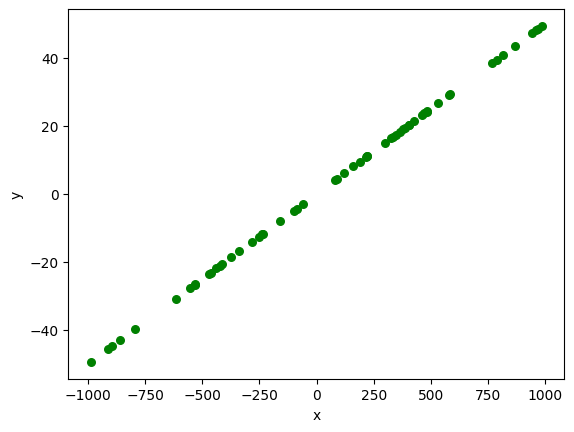

In [88]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_2x2_lib dla precyzji float32")
Diffrence(LMR_d_float32[3],LMR_d_float32[8])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_3x3 i mat_det_3x3_lib dla precyzji float32
Diffrence:  28


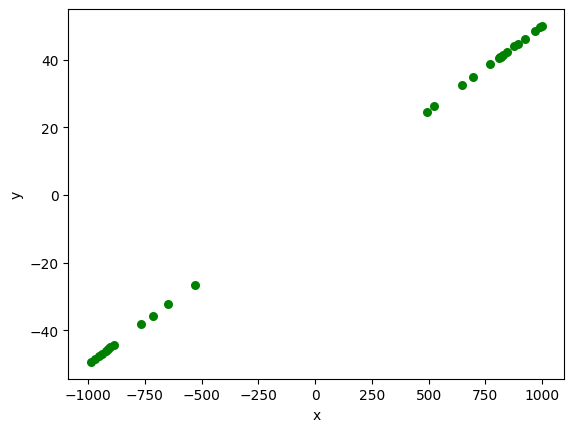

In [89]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_3x3 i mat_det_3x3_lib dla precyzji float32")
Diffrence(LMR_d_float32[13],LMR_d_float32[18])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32
Diffrence:  40


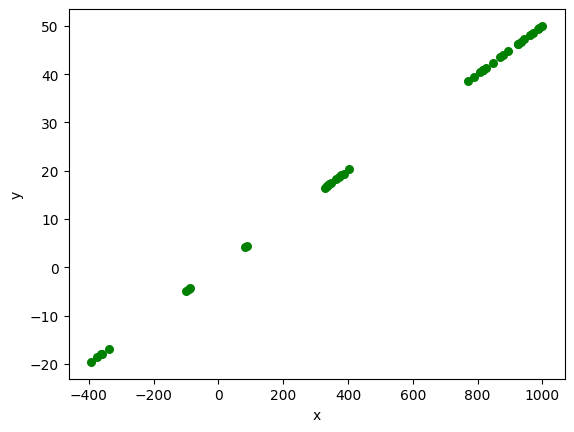

In [90]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2 i mat_det_3x3 dla precyzji float32")
Diffrence(LMR_d_float32[3],LMR_d_float32[13])

Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2_lib i mat_det_3x3_lib dla precyzji float32
Diffrence:  61


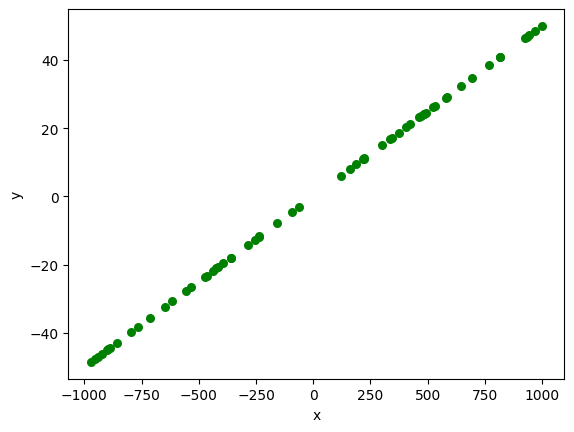

In [92]:
print("Punkty skateryzowane inaczej w zestawie 4 dla mat_det_2x2_lib i mat_det_3x3_lib dla precyzji float32")
Diffrence(LMR_d_float32[8],LMR_d_float32[18])

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
